In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
label_dir="/mnt/d//Smoke-Fall-YOLO-datasets/trainset/labels"

In [3]:
label_files = [os.path.join(label_dir, f) 
              for f in os.listdir(label_dir) 
              if f.endswith('.txt')]

In [4]:
all_labels = []
for txt_file in label_files:
    try:
        with open(txt_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                # 跳过空行
                if line.strip() == "": 
                    continue
                    
                parts = line.split()
                # 确保有5个值（class_id + 4个坐标）
                if len(parts) == 5:  
                    class_id = int(parts[0])
                    all_labels.append(class_id)
    except Exception as e:
        print(f"处理文件 {txt_file} 时出错: {str(e)}")

类别分布统计:
0    1272
1    1186
Name: count, dtype: int64


/tmp/ipykernel_635/527200956.py:32: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_635/527200956.py:32: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_635/527200956.py:32: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_635/527200956.py:32: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_635/527200956.py:32: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_635/527200956.py:32: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_635/527200956.py:32: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from

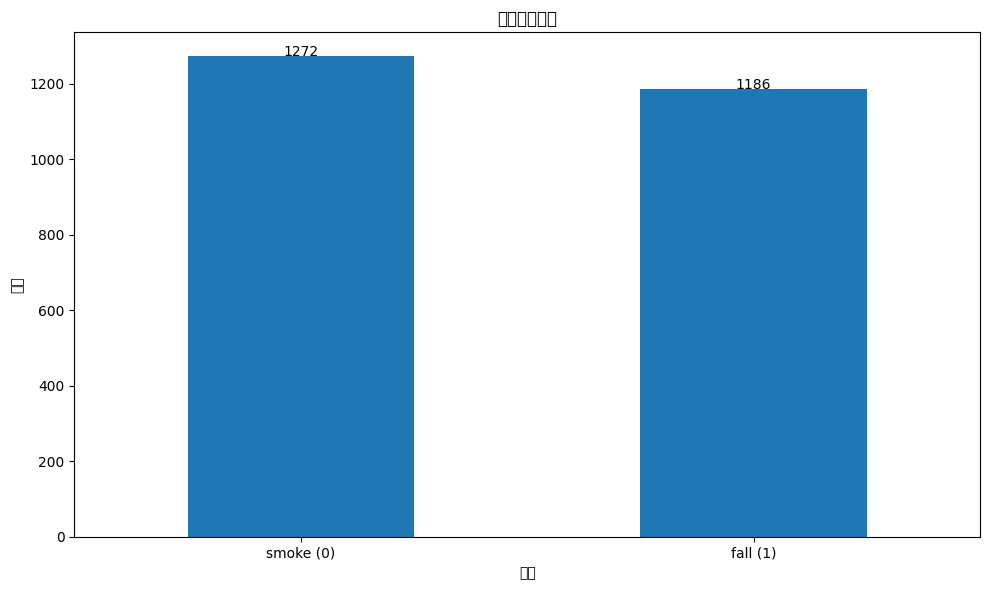

In [5]:
# 4. 统计并绘制结果
if all_labels:
    # 创建Series对象
    label_series = pd.Series(all_labels)
    
    # 统计各类别数量
    counts = label_series.value_counts().sort_index()
    
    # 打印统计结果
    print("类别分布统计:")
    print(counts)
    
    # 使用类别名称（从你的data.yaml中获取）
    class_names = ['smoke', 'fall']  # 对应类别0和1
    
    # 创建带类别名称的统计
    named_counts = counts.rename(index=lambda x: f"{class_names[x]} ({x})")
    
    # 绘制条形图
    ax = named_counts.plot.bar(
        title="目标类别分布",
        xlabel="类别",
        ylabel="数量",
        figsize=(10, 6),
        rot=0  # 横轴标签不旋转
    )
    
    # 在柱子上方显示数量
    for i, v in enumerate(counts):
        ax.text(i, v + 0.5, str(v), ha='center')
    
    plt.tight_layout()
    plt.savefig("class_distribution.png")  # 保存图表
    plt.show()
else:
    print("未找到有效的标签数据")

In [6]:
# 添加数据集大小统计
print(f"总标签文件数: {len(label_files)}")
print(f"总目标实例数: {len(all_labels)}")
print(f"平均每张图像目标数: {len(all_labels)/len(label_files):.2f}")

# 添加类别比例计算
total = len(all_labels)
for class_id, count in counts.items():
    print(f"{class_names[class_id]} 占比: {count/total:.2%}")

总标签文件数: 2363
总目标实例数: 2458
平均每张图像目标数: 1.04
smoke 占比: 51.75%
fall 占比: 48.25%
